In [1]:

"""import the txt files to python"""
import glob
import pandas as pd
import pickle
import os
import re
import shutil

# made this more explicit since I'm the only one using this script and also only once
PATH_IN = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana01"
PATH_OUT_COMPARED = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana05\with_comparison/"
PATH_OUT_NOT_COMPARED = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana05\no_comparison/"

condition = '2backPS'

# Check if output directory exists, if not, create it
if not os.path.exists(PATH_OUT_COMPARED):
    os.makedirs(PATH_OUT_COMPARED)

# Check if unmatched directory exists, if not, create it
if not os.path.exists(PATH_OUT_NOT_COMPARED):
    os.makedirs(PATH_OUT_NOT_COMPARED)


print(os.getcwd())


c:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\imaginal_bottleneck\analysis


In [2]:
# Dictionary to store trial information
trial_info = {}

if __name__ == '__main__':
    current_path_trace = os.path.join(PATH_IN, f'{condition}_trace_???.p')
    print(f"Searching for trace files in: {current_path_trace}")

    # Get all trace files for the specified condition
    all_runs_trace = glob.glob(current_path_trace)

    for i, run_trace_filename in enumerate(all_runs_trace):
        # Extract run number from the trace filename
        run_number = int(os.path.basename(run_trace_filename).split('_')[-1].split('.')[0])

        # Load trace data from pickle file
        formatted_run_trace = pickle.load(open(run_trace_filename, 'rb'))

        # List of actions to count
        actions_to_count = [
            '** COMPARE-SUPPORT-OPTION1 ** [goal1]',
            '** COMPARE-SUPPORT-OPTION2 ** [goal1]',
            '** COMPARE-SUPPORT-OPTION3 ** [goal1]',
        ]

        # Count occurrences for each action
        compare_support_count = sum(
            formatted_run_trace[formatted_run_trace['action'] == action].shape[0]
            for action in actions_to_count
        )

        if compare_support_count > 0:
            print(f"{condition} Run {run_number} - Trace has {compare_support_count} occurrences of 'compare-support'")

            # Save trace file with the original filename
            trace_filename_compared = os.path.join(PATH_OUT_COMPARED, os.path.basename(run_trace_filename))
            pickle.dump(formatted_run_trace, open(trace_filename_compared, 'wb'))

            # Save trial information
            trial_info[run_number] = compare_support_count
            
        else:
            print(f"{condition} Run {run_number} - Trace has no occurrences of 'compare-support'")

            # Copy both unmatched files for a trial to PATH_OUT_UNMATCHED
            shutil.copy(run_trace_filename, os.path.join(PATH_OUT_NOT_COMPARED, os.path.basename(run_trace_filename)))

    print(f"\nSearching for runs with 'compare-support' in {condition} model done!\n")


Searching for trace files in: C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana01\2backPS_trace_???.p
2backPS Run 2 - Trace has 6 occurrences of 'compare-support'
2backPS Run 3 - Trace has 6 occurrences of 'compare-support'
2backPS Run 5 - Trace has 7 occurrences of 'compare-support'
2backPS Run 6 - Trace has 7 occurrences of 'compare-support'
2backPS Run 11 - Trace has 6 occurrences of 'compare-support'
2backPS Run 14 - Trace has 6 occurrences of 'compare-support'
2backPS Run 15 - Trace has 6 occurrences of 'compare-support'
2backPS Run 16 - Trace has 6 occurrences of 'compare-support'
2backPS Run 19 - Trace has 6 occurrences of 'compare-support'
2backPS Run 20 - Trace has 6 occurrences of 'compare-support'
2backPS Run 21 - Trace has 7 occurrences of 'compare-support'
2backPS Run 22 - Trace has 6 occurrences of 'compare-support'
2backPS Run 24 - T

Trials with 'compare-support' occurrences:     130 (100.00%)
Trials without 'compare-support' occurrences:  0 (0.00%)
Average Occurrences of compare-support':       4.92


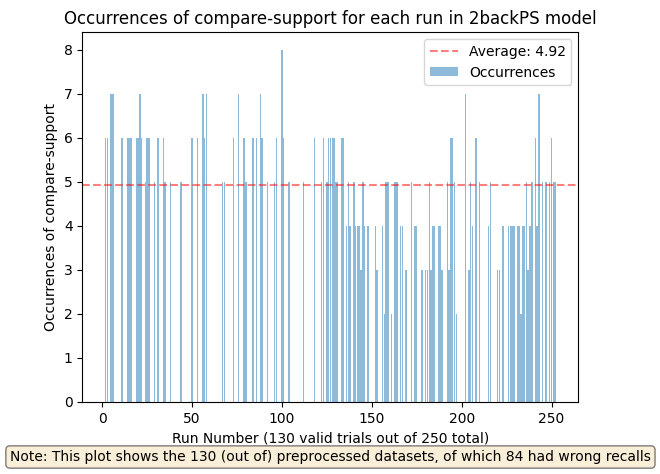

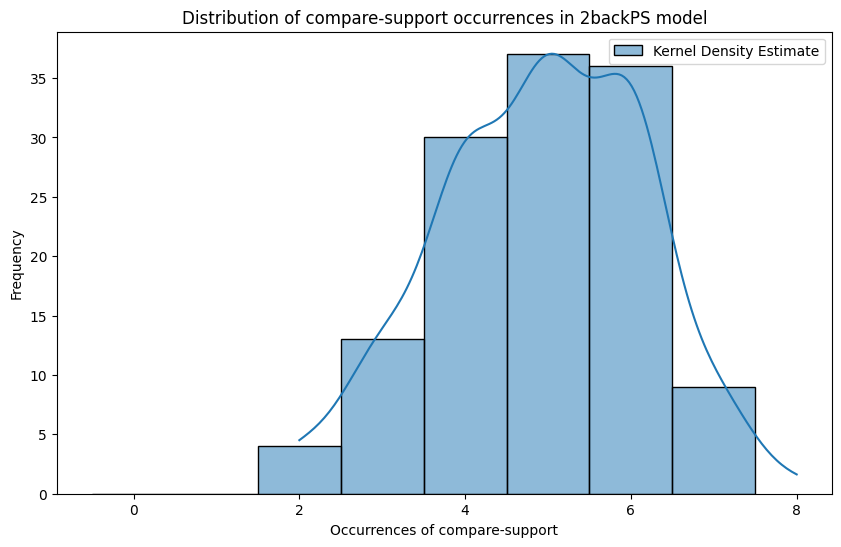

0 runs had 0 occurrences of 'compare-support'
0 runs had 1 occurrences of 'compare-support'
4 runs had 2 occurrences of 'compare-support'
13 runs had 3 occurrences of 'compare-support'
30 runs had 4 occurrences of 'compare-support'
37 runs had 5 occurrences of 'compare-support'
36 runs had 6 occurrences of 'compare-support'
9 runs had 7 occurrences of 'compare-support'
1 runs had 8 occurrences of 'compare-support'


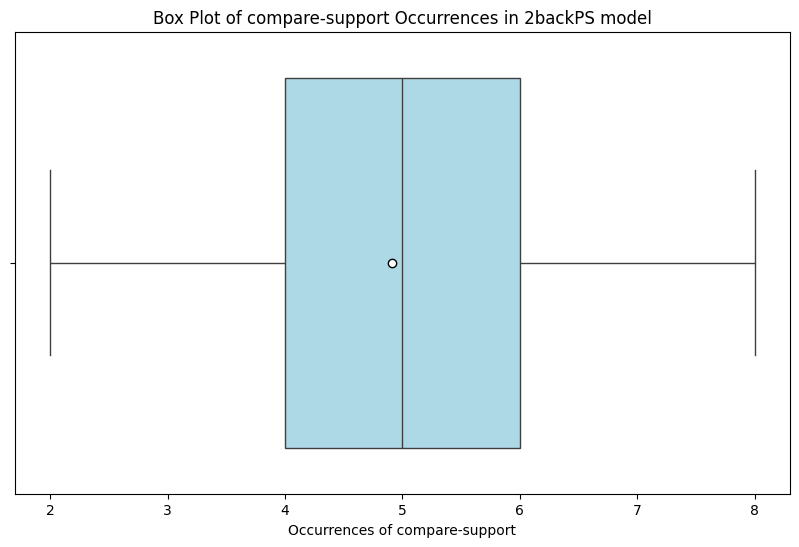

In [3]:
#_________________________________________ STATISTICS AND PLOTS ____________________________________________________________________________


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Overall statistics (# trial_info is the dict) 
total_trials = len(all_runs_trace)
trials_with_occurrences = sum(count > 0 for count in trial_info.values()) 
trials_without_occurrences = total_trials - trials_with_occurrences
average_occurrences = np.mean(list(trial_info.values()))
percentage_with_occurrences = (trials_with_occurrences / total_trials) * 100

print(f"Trials with 'compare-support' occurrences:     {trials_with_occurrences} ({percentage_with_occurrences:.2f}%)")
print(f"Trials without 'compare-support' occurrences:  {trials_without_occurrences} ({100 - percentage_with_occurrences:.2f}%)")
print(f"Average Occurrences of compare-support':       {average_occurrences:.2f}")

#------------------------------------------------ PLOTS ---------------------------------------------------------------------------------------------
# Bar Plot with Average as Legend
plt.bar(trial_info.keys(), trial_info.values(), label='Occurrences', alpha=0.7)
plt.axhline(y=average_occurrences, color='r', linestyle='--', label=f'Average: {average_occurrences:.2f}', alpha=0.5)
plt.xlabel('Run Number (130 valid trials out of 250 total)')
plt.ylabel('Occurrences of compare-support')
plt.title(f'Occurrences of compare-support for valid run in {condition} model')
plt.text(0.5, -0.15, 'Note: This plot shows the 130 (out of) preprocessed datasets, of which 84 had at least one wrong recall', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend()
plt.show()


# Distribution of Occurrences (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(list(trial_info.values()), bins=np.arange(0, max(trial_info.values()) + 1) - 0.5, kde=True, label='Kernel Density Estimate')
plt.xlabel('Occurrences of compare-support')
plt.ylabel('Frequency')
plt.title(f'Distribution of compare-support occurrences in {condition} model')
plt.legend()  
plt.show()


# Frequency of Occurrences
occurrences_counts = np.bincount(list(trial_info.values()))
for count, frequency in enumerate(occurrences_counts):
    print(f"{frequency} runs had {count} occurrences of 'compare-support'")


# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=list(trial_info.values()), showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"}, showfliers=True, boxprops=dict(facecolor="lightblue"))
plt.xlabel('Occurrences of compare-support')
plt.title(f'Box Plot of compare-support Occurrences in {condition} model')
plt.show()


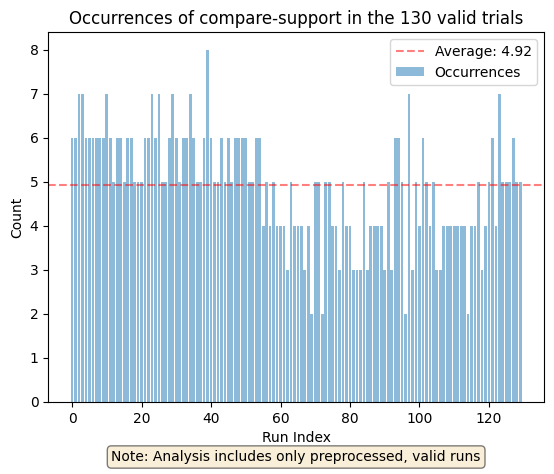

In [5]:
#____________________________________________ only the valid runs ___________________________________________________________________________


# Bar Plot with Average as Legend
plt.bar(range(len(trial_info)), trial_info.values(), label='Occurrences', alpha=0.5)
plt.axhline(y=average_occurrences, color='r', linestyle='--', label=f'Average: {average_occurrences:.2f}', alpha=0.5)
plt.xlabel('Run Index')
plt.ylabel('Count')
plt.title(f'Occurrences of compare-support in the 130 valid trials')
plt.text(0.5, -0.15, 'Note: Analysis includes only preprocessed, valid runs', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend()
plt.show()